# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [1]:
# read the titanic train.csv file into a dataframe
import pandas as pd
df=pd.read_csv('train.csv')

In [3]:
# show the percentage of the passengers that boarded at different ports
c=(df.Embarked.value_counts()['C']/df.Embarked.value_counts().sum())*100
q=(df.Embarked.value_counts()['Q']/df.Embarked.value_counts().sum())*100
s=(df.Embarked.value_counts()['S']/df.Embarked.value_counts().sum())*100
print('percentage of diffrent ports are:')
print(f'Cherbourg(C):{c:.2f}%')
print(f'Queenstown(Q):{q:.2f}%')
print(f'Southampton(S):{s:.2f}%')

percentage of diffrent ports are:
Cherbourg(C):18.90%
Queenstown(Q):8.66%
Southampton(S):72.44%


<AxesSubplot:>

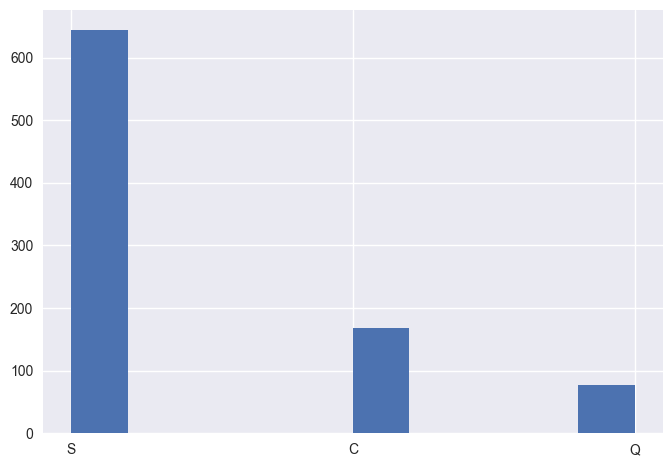

In [4]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.Embarked.hist()

![output](https://user-images.githubusercontent.com/595772/158029846-286dca93-ac7d-4edd-bd0e-da3b46906905.png)

In [6]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.
df[df['Survived']==1]
female=(df.Sex.value_counts()['female']/df.Sex.value_counts().sum())*100
male=(df.Sex.value_counts()['male']/df.Sex.value_counts().sum())*100
print('survival rates by gender:')
print(f'female:{female:.2f}%')
print(f'male:{male:.2f}%')

survival rates by gender:
female:35.24%
male:64.76%


In [16]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
df_sorted_fare=df.sort_values(by='Fare',ascending=False,ignore_index=True)
df_sorted_fare.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
1,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
2,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
3,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
4,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


Text(0, 0.5, 'ticket price')

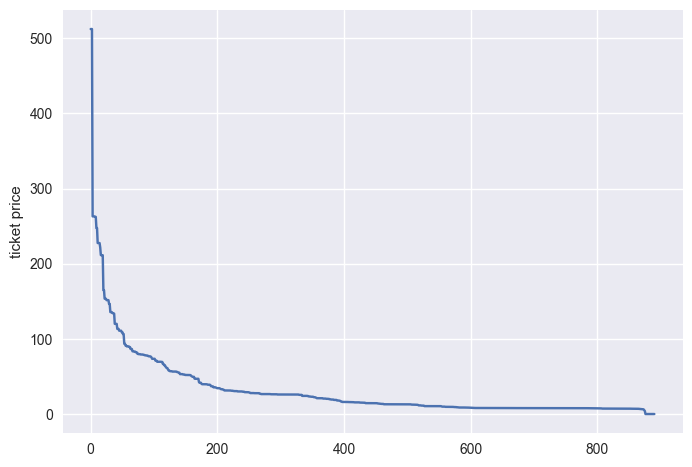

In [17]:
df_sorted_fare.Fare.plot().set_ylabel('ticket price')


![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



Text(0.5, 0, 'Pclass=3')

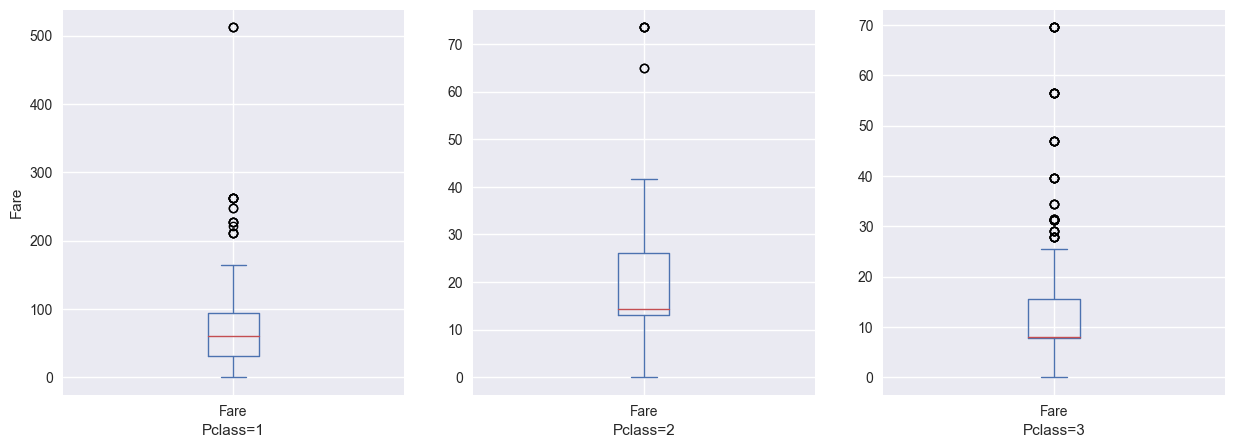

In [21]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below
fig,ax=plt.subplots(1,3,figsize=(15,5))
df[df['Pclass']==1].Fare.plot.box(ax=ax[0])
ax[0].set_ylabel('Fare')
ax[0].set_xlabel('Pclass=1')
df[df['Pclass']==2].Fare.plot.box(ax=ax[1])
ax[1].set_xlabel('Pclass=2')
df[df['Pclass']==3].Fare.plot.box(ax=ax[2])
ax[2].set_xlabel('Pclass=3')

![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [37]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function
df_sorted_class=df.groupby('Pclass')
print(df_sorted_class.size())
from itertools import groupby
for group,groupby in df_sorted_class:
    print('-'*30)
    print(f'group {group}')
    print('survived:')
    print(groupby.Survived.value_counts())


Pclass
1    216
2    184
3    491
dtype: int64
------------------------------
group 1
survived:
1    136
0     80
Name: Survived, dtype: int64
------------------------------
group 2
survived:
0    97
1    87
Name: Survived, dtype: int64
------------------------------
group 3
survived:
0    372
1    119
Name: Survived, dtype: int64


In [40]:
print(f'survival rate \nclass 1: {(136/216)*100:.2f}%\nclass 2: {(87/184)*100:.2f}%\nclass 3: {(119/431)*100:.2f}%')
print(f'for people with ticket class 1 , the survival rate is the highest, which is {(136/216)*100:.2f}%')

survival rate 
class 1: 62.96%
class 2: 47.28%
class 3: 27.61%
for people with ticket class 1 , the survival rate is the highest, which is 62.96%


In [46]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# a sample diagram is shown below
Pclass_survived={'Pclass':[(1,1),(1,0),(2,0),(2,1),(3,0),(3,1)],'survived':[0.6296,0.3704,0.5272,0.4728,0.7239,0.2761]}
df_Pclass_survived=pd.DataFrame(Pclass_survived)
df_Pclass_survived

,Pclass,survived
0,"(1, 1)",0.6296
1,"(1, 0)",0.3704
2,"(2, 0)",0.5272
3,"(2, 1)",0.4728
4,"(3, 0)",0.7239
5,"(3, 1)",0.2761


Text(0.5, 0, 'Pclass,Survived')

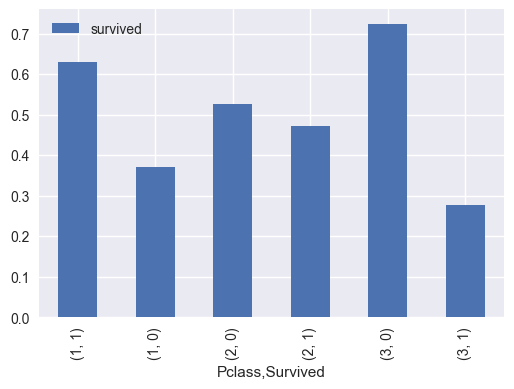

In [57]:
fig,ax=plt.subplots(figsize=(6,4))
df_Pclass_survived.plot.bar(ax=ax).set_xticks(df_Pclass_survived.index,df_Pclass_survived.Pclass,rotation=90)
ax.set_xlabel('Pclass,Survived')

![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
